# Example of not understood behaviours

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import optimize

## Fitting with unfixed number of parameters

In this section, we try to fit pseudo-data using a generic polynom function using packing/unpacking technics to pass an arbitrary number of coefficient `*p` (or degree of the polynom). The first function is the general one *for which the fit doesn't work* while the second one is the simple one *for which the fit works*.

In [38]:
def pol2(x, a, b, c):
    return a + b*x + c*x**2

def pol_func(x, *p):
    a = np.array([p[i]*x**i for i in range(len(p))])
    return np.sum(a)

Now we can use these function fit pseudo-data, which are created here:

In [39]:
Npoints = 10
x = np.linspace(0.0, 3.5, Npoints)
y = 1.5*(np.sin(x) + np.random.random(Npoints)*0.3)
dy = 0.05+0.3*y

Then we compare the fit optained using `pol2` and with `pol_func` where the number of parameters to minimize is determined using the initial paramters argument `p0 = [1, 1, 1]`. The first case give the proper result while the second case simply doesn't work, and no message is given:

In [45]:
# Fit with pol2 -> OK
best_par2, cov = optimize.curve_fit(pol2_test, x, y, sigma=dy/y, p0=initial_paramters)
print(best_par2)
      
# Fit wit pol_func -> not OK
best_par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy/y, p0=[1.0, 1.0, 1.0])
print(best_par)

[ 0.3897981   1.58640004 -0.4995235 ]
[-314.17721884  113.33403446   26.89825003]


The best values obtained in each case is totally different and we can simply see which one works by plotting the result:

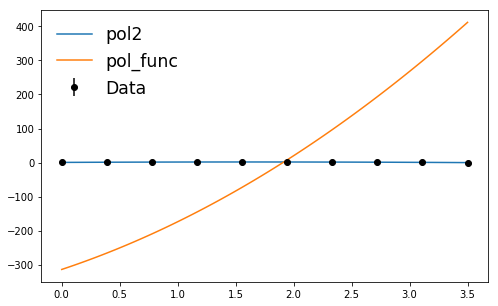

In [46]:
# Plot data and fit
xcont = np.linspace(x[0],x[-1],100)
fig = plt.figure(figsize=(8,5))
_ = plt.errorbar(x, y, yerr=dy, marker='o', color='black', linestyle='', label='Data')
_ = plt.plot(xcont, pol2(xcont, *best_par2), label='pol2')
_ = plt.plot(xcont, [pol_func(v, *best_par) for v in xcont], label='pol_func')
_ = plt.legend(frameon=False, fontsize='xx-large')